In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
df = pd.read_excel("data_set_label.xlsx")
x = np.zeros((1 , 224, 224*2 , 3))
for i in range(1 , 51, 1):
    for j in range(1, 51 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)[: , : , :3]
            img = img.reshape(1 , 224 , 224*2 , 3)
            if(i == 1 and j==2 ):
                x =  img
            else:
                x = np.append(x , img , axis = 0)

In [3]:
x.shape

(200, 224, 448, 3)

In [30]:
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import find_boundaries

label = np.zeros((1 ,4))

for k in range(200):

    d = np.split(x[k] , indices_or_sections=2 , axis = 1)
    p = sobel(d[1]-d[0])
    p = find_boundaries(rgb2gray(p))
    first_point = 0
    first_loc = []
    last_loc = [0 , 0]
    for i in range(224):
        for j in range(224):
            if(p[i][j]==True and first_point==0):
                first_loc = [i , j]
                first_point= 1
            if((last_loc[0]<i or last_loc[1]<j) and p[i][j]==True  ):
                last_loc[0] = i
                last_loc[1] = j 
    locations = np.array((first_loc[0] , first_loc[1] , last_loc[0] , last_loc[1]))    
    if(k == 0):
        label[0] = locations
    else:
        label = np.append(label , locations  )      

In [153]:
label = label.reshape(200 , 4)
print(label[190])

[ 46. 110.  75.  96.]


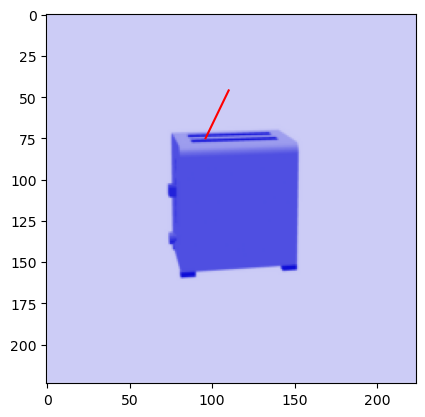

In [155]:
plt.imshow(x[90][0:224 , 0:224])
plt.plot([110 , 96] , [46 , 75] , color= 'r')

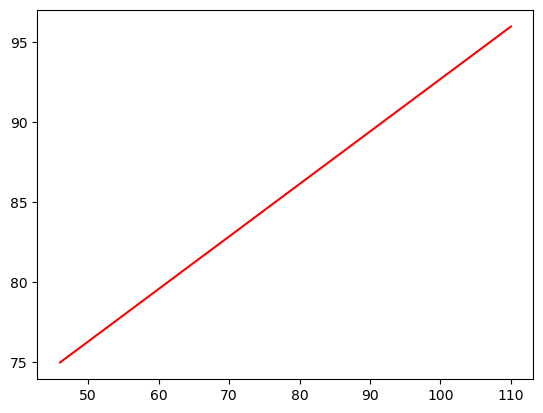

In [6]:
label_0 = np.zeros((200))
label_1 = np.zeros((200))
label_2 = np.zeros((200))
label_3 = np.zeros((200))

xx = 0
for i in label:
    label_0[xx] = i[0]
    label_1[xx] = i[1]
    label_2[xx] = i[2]
    label_3[xx] = i[3]
    xx = xx+1

In [7]:
label_0.shape

(200,)

In [8]:
image = np.arange(0 , 200)

In [9]:
image.shape

(200,)

In [10]:
p = pd.DataFrame({
    'image':image,
    'label_0':label_0,
    'label_1':label_1,
    'label_2':label_2,
    'label_3':label_3
    }
)
p

,image,label_0,label_1,label_2,label_3
0,0,47.0,107.0,75.0,114.0
1,1,47.0,107.0,77.0,113.0
2,2,47.0,107.0,78.0,114.0
3,3,47.0,107.0,79.0,115.0
4,4,47.0,107.0,75.0,114.0
...,...,...,...,...,...
195,195,49.0,109.0,76.0,96.0
196,196,42.0,109.0,76.0,96.0
197,197,44.0,109.0,76.0,96.0
198,198,46.0,110.0,76.0,96.0


In [11]:
p.to_csv('pp_modeling.csv')

In [13]:
df = pd.read_excel("data_set_label.xlsx")
x = np.zeros((1 , 224, 224*2 , 3))
for i in range(51 , 101, 1):
    for j in range(51, 101, 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)[: , : , :3]
            img = img.reshape(1 , 224 , 224*2 , 3)
            if(i == 1 and j==2 ):
                x =  img
            else:
                x = np.append(x , img , axis = 0)

label = np.zeros((1 ,4))

for k in range(200):

    d = np.split(x[k] , indices_or_sections=2 , axis = 1)
    p = sobel(d[1]-d[0])
    p = find_boundaries(rgb2gray(p))
    first_point = 0
    first_loc = [0 , 0]
    last_loc = [0 , 0]
    for i in range(224):
        for j in range(224):
            if(p[i][j]==True and first_point==0):
                first_loc = [i , j]
                first_point= 1
            if((last_loc[0]<i or last_loc[1]<j) and p[i][j]==True  ):
                last_loc[0] = i
                last_loc[1] = j 
    locations = np.array((first_loc[0] , first_loc[1] , last_loc[0] , last_loc[1]))    
    if(k == 0):
        label[0] = locations
    else:
        label = np.append(label , locations  )  
label = label.reshape(200 , 4)
print(label[190])

label_0 = np.zeros((200))
label_1 = np.zeros((200))
label_2 = np.zeros((200))
label_3 = np.zeros((200))

xx = 0
for i in label:
    label_0[xx] = i[0]
    label_1[xx] = i[1]
    label_2[xx] = i[2]
    label_3[xx] = i[3]
    xx = xx+1
p = pd.DataFrame({
    'image':image,
    'label_0':label_0,
    'label_1':label_1,
    'label_2':label_2,
    'label_3':label_3
    }
)
p.to_csv('no_modeling.csv')

[ 39. 106. 184. 121.]


In [14]:
df = pd.read_excel("data_set_label.xlsx")
x = np.zeros((1 , 224, 224*2 , 3))
for i in range(101 , 151, 1):
    for j in range(101, 151 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)[: , : , :3]
            img = img.reshape(1 , 224 , 224*2 , 3)
            if(i == 1 and j==2 ):
                x =  img
            else:
                x = np.append(x , img , axis = 0)

label = np.zeros((1 ,4))

for k in range(200):

    d = np.split(x[k] , indices_or_sections=2 , axis = 1)
    p = sobel(d[1]-d[0])
    p = find_boundaries(rgb2gray(p))
    first_point = 0
    first_loc = [0 , 0]
    last_loc = [0 , 0]
    for i in range(224):
        for j in range(224):
            if(p[i][j]==True and first_point==0):
                first_loc = [i , j]
                first_point= 1
            if((last_loc[0]<i or last_loc[1]<j) and p[i][j]==True  ):
                last_loc[0] = i
                last_loc[1] = j 
    locations = np.array((first_loc[0] , first_loc[1] , last_loc[0] , last_loc[1]))    
    if(k == 0):
        label[0] = locations
    else:
        label = np.append(label , locations  )  
label = label.reshape(200 , 4)
print(label[190])

label_0 = np.zeros((200))
label_1 = np.zeros((200))
label_2 = np.zeros((200))
label_3 = np.zeros((200))

xx = 0
for i in label:
    label_0[xx] = i[0]
    label_1[xx] = i[1]
    label_2[xx] = i[2]
    label_3[xx] = i[3]
    xx = xx+1
p = pd.DataFrame({
    'image':image,
    'label_0':label_0,
    'label_1':label_1,
    'label_2':label_2,
    'label_3':label_3
    }
)
p.to_csv('p_modeling.csv')

[ 91. 122. 164.  70.]


In [15]:
df = pd.read_excel("data_set_label.xlsx")
x = np.zeros((1 , 224, 224*2 , 3))
for i in range(151 , 201, 1):
    for j in range(151, 201 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)[: , : , :3]
            img = img.reshape(1 , 224 , 224*2 , 3)
            if(i == 1 and j==2 ):
                x =  img
            else:
                x = np.append(x , img , axis = 0)

label = np.zeros((1 ,4))

for k in range(200):

    d = np.split(x[k] , indices_or_sections=2 , axis = 1)
    p = sobel(d[1]-d[0])
    p = find_boundaries(rgb2gray(p))
    first_point = 0
    first_loc = [0 , 0]
    last_loc = [0 , 0]
    for i in range(224):
        for j in range(224):
            if(p[i][j]==True and first_point==0):
                first_loc = [i , j]
                first_point= 1
            if((last_loc[0]<i or last_loc[1]<j) and p[i][j]==True  ):
                last_loc[0] = i
                last_loc[1] = j 
    locations = np.array((first_loc[0] , first_loc[1] , last_loc[0] , last_loc[1]))    
    if(k == 0):
        label[0] = locations
    else:
        label = np.append(label , locations  )  
label = label.reshape(200 , 4)
print(label[190])

label_0 = np.zeros((200))
label_1 = np.zeros((200))
label_2 = np.zeros((200))
label_3 = np.zeros((200))

xx = 0
for i in label:
    label_0[xx] = i[0]
    label_1[xx] = i[1]
    label_2[xx] = i[2]
    label_3[xx] = i[3]
    xx = xx+1
p = pd.DataFrame({
    'image':image,
    'label_0':label_0,
    'label_1':label_1,
    'label_2':label_2,
    'label_3':label_3
    }
)
p.to_csv('r_modeling.csv')

[ 50. 125. 116. 121.]
